In [881]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [882]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [883]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [884]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [885]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool");

In [886]:
data.floor.value_counts()

1                       4046
2                       3233
3                       2722
4                       2117
Bajo                    1829
5                       1225
6                        844
7                        537
8                        309
Entreplanta exterior     225
9                        175
Semi-sótano exterior      50
Entreplanta interior      32
Semi-sótano interior      29
Sótano interior           21
Sótano exterior            4
Name: floor, dtype: int64

In [887]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [888]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [889]:
data.floor = pd.to_numeric(data.floor)

In [890]:
data.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,"San Cristóbal, Villaverde(Madrid)",0,0,0,64.0,2,1.0,3,1,0,0,0,0,0,0,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",0,1,0,70.0,3,1.0,4,1,1,0,0,1,0,0,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",0,0,0,94.0,2,2.0,1,1,1,0,1,0,0,0,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",0,0,0,64.0,2,1.0,0,1,1,0,1,0,0,0,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",0,0,0,108.0,2,2.0,4,1,1,1,1,0,0,1,260000,2407,40.355841,-3.688399


In [891]:
data.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude'],
      dtype='object')

In [892]:
# Todos los datos

data = data [['house_type_id', 'is_renewal_needed','is_new_development',
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

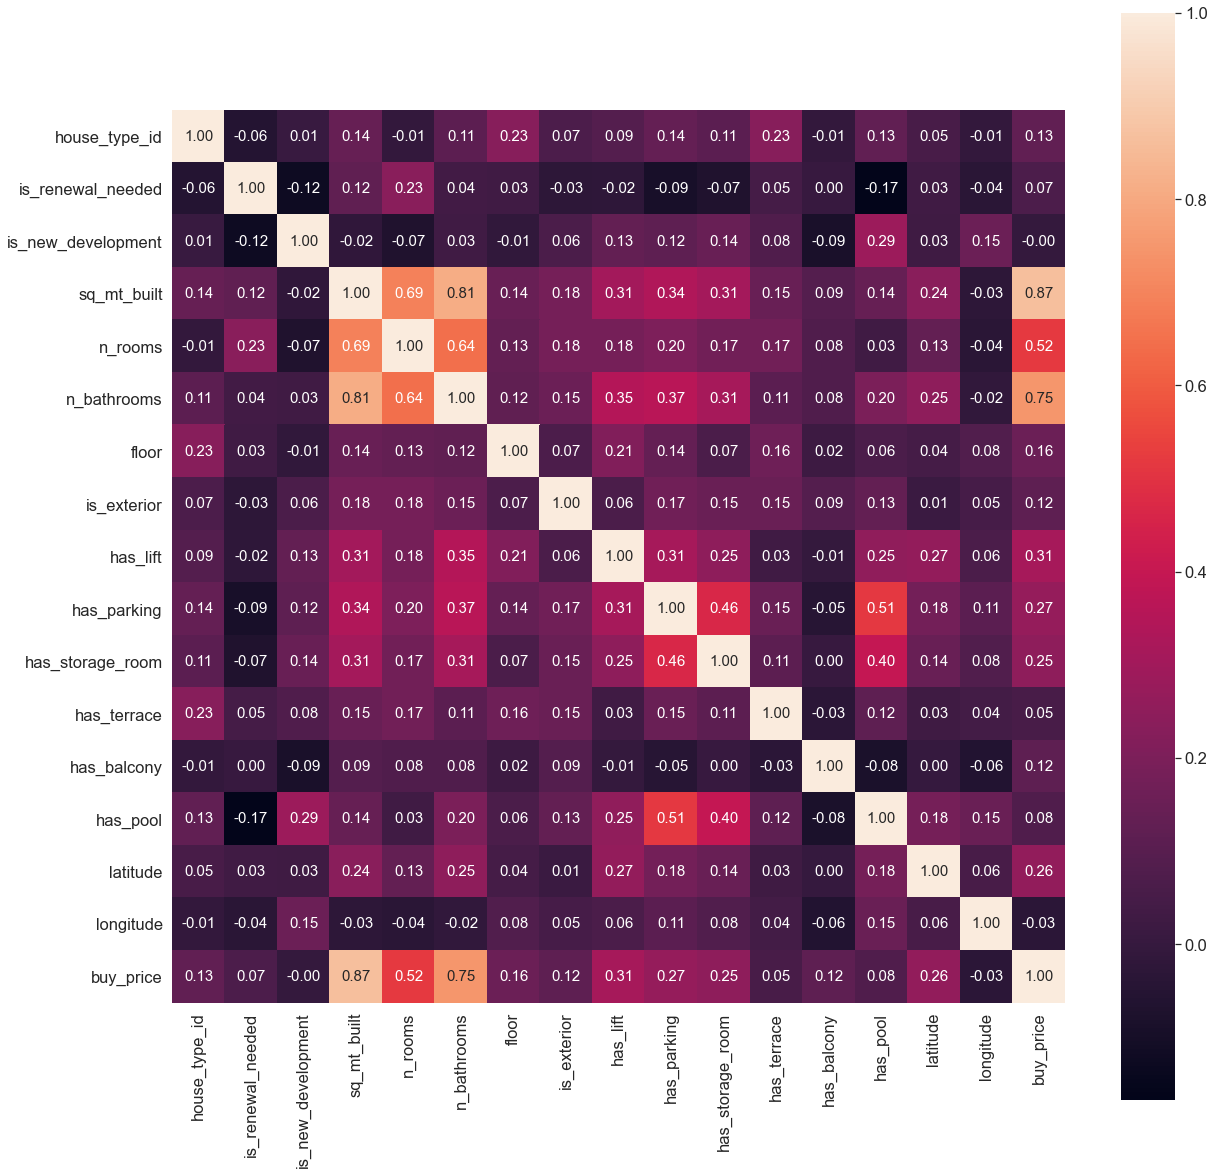

In [893]:
# Heatmap.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

In [894]:
data.head()

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
0,0,0,0,64.0,2,1.0,3,1,0,0,0,0,0,0,40.343263,-3.688352,85000
1,0,1,0,70.0,3,1.0,4,1,1,0,0,1,0,0,40.355109,-3.700105,129900
2,0,0,0,94.0,2,2.0,1,1,1,0,1,0,0,0,40.345539,-3.710970,144247
3,0,0,0,64.0,2,1.0,0,1,1,0,1,0,0,0,40.345539,-3.710970,109900
4,0,0,0,108.0,2,2.0,4,1,1,1,1,0,0,1,40.355841,-3.688399,260000


In [895]:
data = data [['house_type_id', 'is_renewal_needed','is_new_development',
              'sq_mt_built', 'n_rooms', 'floor', 'is_exterior',
              'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
              'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

In [896]:
# ROBUST

#from sklearn.preprocessing import RobustScaler

# create a scaler object
#scaler = RobustScaler()
# fit and transform the data
#data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

#data

In [897]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from pyod.models.knn import KNN
from sklearn.ensemble import IsolationForest

In [898]:
"""clf = KNN(contamination=0.5, method="largest", algorithm="auto")
clf.fit(data)
y_pred = clf.predict(data)
dropea = data[y_pred == 1]"""

'clf = KNN(contamination=0.5, method="largest", algorithm="auto")\nclf.fit(data)\ny_pred = clf.predict(data)\ndropea = data[y_pred == 1]'

In [899]:
#data = data.drop(dropea.index)

In [900]:
data.describe()

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,latitude,longitude,buy_price
count,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,17398.000000,1.739800e+04
mean,0.140821,0.196172,0.058512,124.480400,2.866536,2.623922,0.906311,0.776928,0.330038,0.344925,0.424991,0.162088,0.200483,40.423790,-3.688984,5.660945e+05
std,0.474987,0.397112,0.234717,86.350814,1.230238,2.112466,0.291404,0.416318,0.470240,0.475357,0.494356,0.368542,0.400373,0.035419,0.036758,6.148399e+05
min,0.000000,0.000000,0.000000,16.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.339934,-3.828783,3.600000e+04
25%,0.000000,0.000000,0.000000,70.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.397292,-3.708916,1.989685e+05
50%,0.000000,0.000000,0.000000,97.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.426708,-3.693014,3.600000e+05
75%,0.000000,0.000000,0.000000,146.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.449115,-3.667970,6.750000e+05
max,2.000000,1.000000,1.000000,1165.000000,15.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,40.520554,-3.546616,8.800000e+06


/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


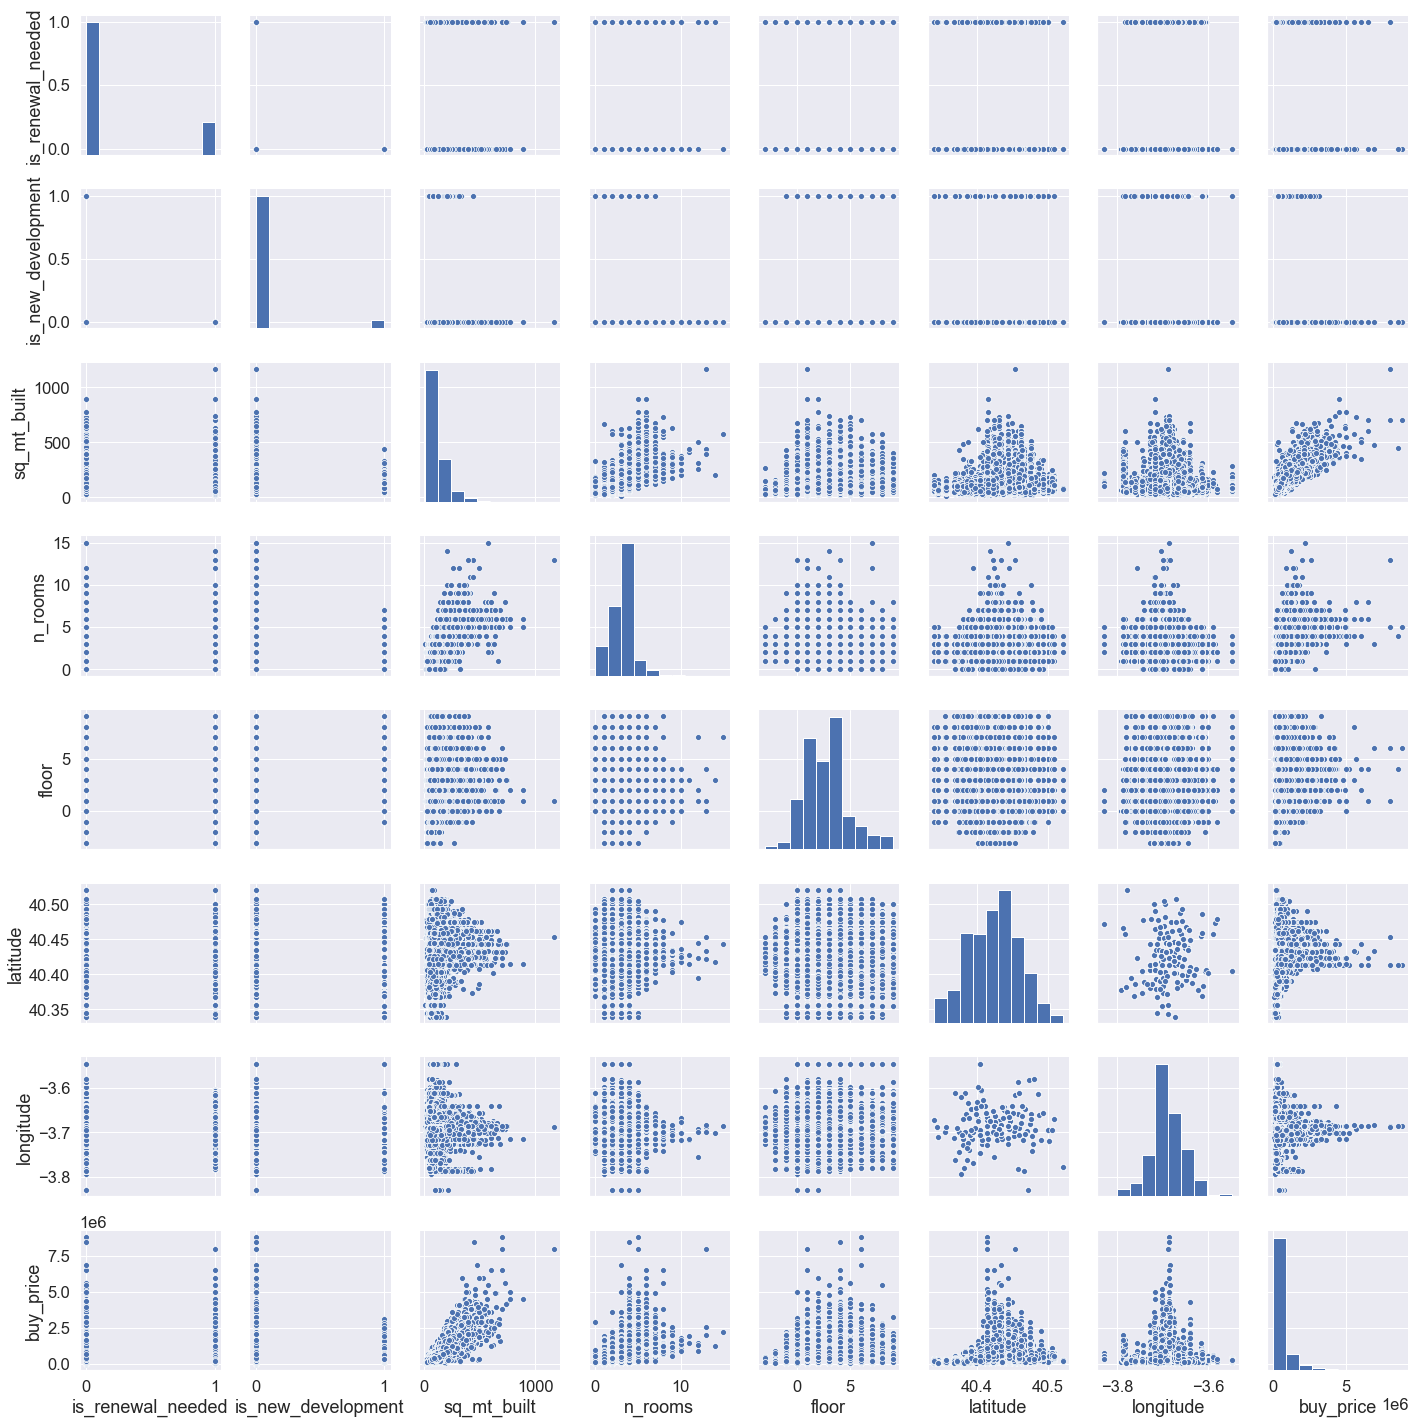

In [901]:
d_analysis1 = data[["is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",
                    'floor', 'latitude', 'longitude', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()

In [902]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [903]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=7)

In [904]:
clf = KNN(contamination=0.5, method="largest", algorithm="auto")
l = clf.fit(X_train)
# Obtenemos los outliers del X_train.
y_pred = clf.predict(X_train)
# Seleccionamos aquellos elementos que no son outliers.
X_train = X_train[y_pred == 1]
y_train = y_train[y_pred == 1]

In [905]:
#iso = IsolationForest(contamination=0.1)
#yhat = iso.fit_predict(X_train)

In [906]:
#mask = yhat != -1
#X_train, y_train = X_train[mask, :], y_train[mask]

In [907]:
models = {
    "XGBRegressor" : XGBRegressor(objective ='reg:squarederror'),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [908]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado")

Entrenando XGBRegressor
Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado


-------XGBRegressor-------
RMSE 206573.013
R2 0.89
-------DecisionTree-------
RMSE 285368.764
R2 0.791
-------RandomForest-------
RMSE 199835.69
R2 0.897
-------ExtraTrees-------
RMSE 197105.774
R2 0.9
-------GradientBoosting-------
RMSE 214309.357
R2 0.882
-------HistGradientBoosting-------
RMSE 196835.195
R2 0.9
-------Voting-------
RMSE 196770.145
R2 0.9


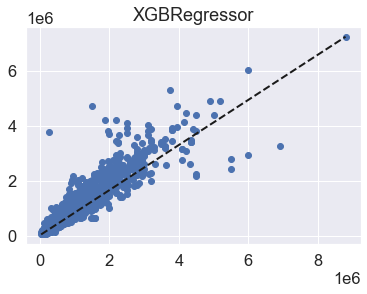

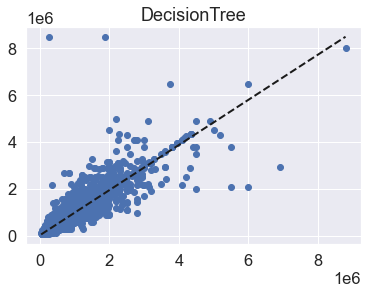

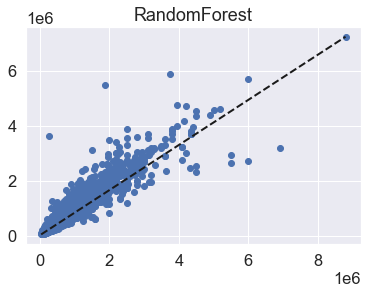

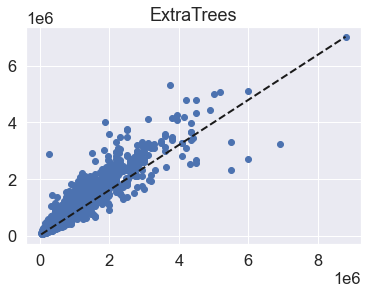

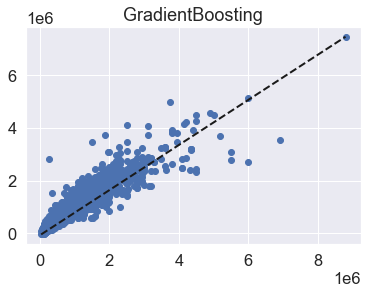

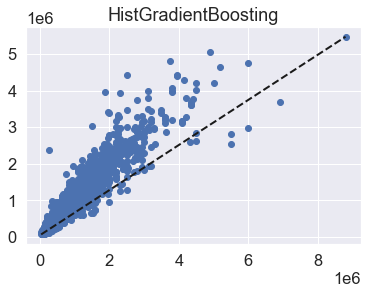

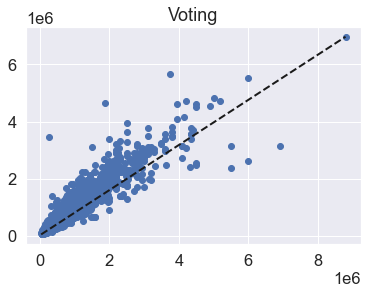

In [909]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [697]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

XGBRegressor accuracy0.8767479040603507
DecisionTree accuracy0.7702257982770355
RandomForest accuracy0.8758010949711501
ExtraTrees accuracy0.8680382787476981
GradientBoosting accuracy0.769587716704898
HistGradientBoosting accuracy0.8713293894362387
Voting accuracy0.8817915756601756


# Análisis de los datos

In [207]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [ ]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [ ]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

In [ ]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [ ]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [ ]:
data.floor = pd.to_numeric(data.floor)

In [ ]:
data.describe()

# Elimino datos atípicos

In [ ]:
data = pd.read_csv("../outputs/clean_houses.csv", index_col=0)

In [ ]:
plt.scatter(data["sq_mt_built"], data["buy_price"])

In [ ]:
data.head()

In [ ]:
"""data = data.drop(data[data["house_type_id"]=="HouseType 4: Dúplex"].index)
data = data.drop(data[data["house_type_id"]=="HouseType 5: Áticos"].index)"""
#rt = lambda x: (1500*x+200000) 
data = data.drop(data[data["buy_price"]>900000].index)
data = data.drop(data[data["buy_price"]<120000].index)
data = data.drop(data[data["sq_mt_built"]>300].index)
#& data[data.apply(lambda row: data["buy_price"]<rt(data["sq_mt_built"]), axis=1)]].index)
#data = data.drop(data[data["sq_mt_built"]<50].index)
data = data.drop(data[data["n_rooms"]>3].index)
data = data.drop(data[data["n_rooms"]<1].index)
data = data.drop(data[data["n_bathrooms"]>2].index)

In [ ]:
plt.scatter(data["sq_mt_built"], data["buy_price"])

In [ ]:
"""data = data.drop(data[data["house_type_id"]=="HouseType 4: Dúplex"].index)
data = data.drop(data[data["house_type_id"]=="HouseType 5: Áticos"].index)
data = data.drop(data[data["buy_price"]>700000].index)
data = data.drop(data[data["buy_price"]<190000].index)
data = data.drop(data[data["sq_mt_built"]>200].index)
data = data.drop(data[data["sq_mt_built"]<50].index)
data = data.drop(data[data["n_rooms"]>3].index)
data = data.drop(data[data["n_rooms"]<2].index)
data = data.drop(data[data["n_bathrooms"]>2].index)
data = data.drop(data[data["n_bathrooms"]<1].index)"""

In [ ]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [ ]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

In [ ]:
planta={"Bajo": 0,
       "Entreplanta exterior": -1,
        "Entreplanta interior": -1,
       "Semi-sótano exterior": -2,    
        "Semi-sótano interior": -2,   
        "Sótano interior": -3,          
        "Sótano exterior": -3}

In [ ]:
data.floor = data.floor.apply(lambda x: planta.get(x, x))

In [ ]:
data.floor = pd.to_numeric(data.floor)

In [ ]:
data = data.drop(data[data["floor"]<1].index)

In [ ]:
data.columns

In [ ]:
data = data [['is_renewal_needed', 'is_new_development', 
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
              'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
              'has_terrace', 'has_balcony', 'has_pool', 'latitude',
              'longitude', 'buy_price']]

In [ ]:
data.describe()

In [ ]:
d_analysis1 = data[["is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",
                    "n_bathrooms", 'floor', 'latitude',
              'longitude', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()

In [ ]:
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.5)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                 cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=data.columns,
                xticklabels=data.columns)

In [ ]:
data = data [['is_renewal_needed', 'is_new_development', 
              'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
              'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
              'has_terrace', 'has_balcony', 'has_pool', 'latitude',
              'longitude', 'buy_price']]

In [ ]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]   

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [ ]:
models = {
    "XGBRegressor" : XGBRegressor(objective ='reg:squarederror'),
    "LinearRegression" : LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [ ]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

In [ ]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)